# Sequence Labelling and Classification

In this session we will first investigate Part-of-Speech (POS) tagging and Named-entity recognition (NER).
- For this we will make use of the spaCy natural langauge processing API: https://spacy.io/
- spaCy is an opensource API that provides state-of-the-art performance on sequence labeling tasks such as POS tagging and NER.
- Parts of this tutorial are based on code from: https://medium.com/data-science/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da


## Installing spaCy and downloading models

First we need to check whether the spaCy library is installed:

In [1]:
%pip install -q spacy

Note: you may need to restart the kernel to use updated packages.


Then we need to download pretrained models for use with spaCy. We will load models for both English and Italian:
- The models are called 'en_core_web_sm' and 'it_core_news_sm', where the 'web'/'news' indicates what type of collection the model was trained on and the 'sm' at the end indicates that we are using the 'small' version of the models
- Other models are available here: https://spacy.io/models

If the model is not download automatically, uncomment the following code. It calls the python executable instructing it to run the module 'spacy', which in turn download the models. See discussion here: https://stackoverflow.com/questions/46148033/unable-to-load-en-from-spacy-in-jupyter-notebook

In [2]:
!python -m spacy download en_core_web_sm
!python -m spacy download it_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Using cached https://github.com/explosion/spacy-models/releases/download/it_core_news_sm-3.8.0/it_core_news_sm-3.8.0-py3-none-any.whl (13.0 MB)
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')


We are now ready to import spacy and load a model. Let's start with the English model:

In [3]:
import spacy

nlp_model = spacy.load("en_core_web_sm")

Consider the following piece of text:

In [4]:
text = 'Melbourne is to re-enter Stage 3 lockdown after a record increase in cases. Victorian state premier Daniel Andrews said there was “simply no alternative” to reimposing stay at home restrictions in Australia’s second-biggest city.'
# text = "Good evening, London. Allow me first to apologize for this interruption. I do, like many of you, appreciate the comforts of everyday routine, the security of the familiar, the tranquillity of repetition. I enjoy them as much as any bloke. But in the spirit of commemoration, whereby those important events of the past, usually associated with someone's death or the end of some awful bloody struggle, are celebrated with a nice holiday, I thought we could mark this November the fifth, a day that is sadly no longer remembered, by taking some time out of our daily lives to sit down and have a little chat."
print(text)

Melbourne is to re-enter Stage 3 lockdown after a record increase in cases. Victorian state premier Daniel Andrews said there was “simply no alternative” to reimposing stay at home restrictions in Australia’s second-biggest city.


Parse the text using the NLP engine:

In [5]:
parsed_text = nlp_model(text)
print(parsed_text)

Melbourne is to re-enter Stage 3 lockdown after a record increase in cases. Victorian state premier Daniel Andrews said there was “simply no alternative” to reimposing stay at home restrictions in Australia’s second-biggest city.


Did it do something? It looks like it has just output the same text.
- Actually, yes. It has parsed the input and built its internal datastructure from it.
- Note that the length of the parsed object is in words, not characters:

In [6]:
print(f'The length of the original text is {len(text)} chacacters')
print(f'The length of the parsed text is {len(parsed_text)} words')

The length of the original text is 229 chacacters
The length of the parsed text is 43 words


Also, the parsed object is not a simple string. It is actually a Spacy **Document** object which implements a to_string() method. If requested access to the object, like in the case of just printing its value, Python automatically look for a to_string method, that's why if we just print the parsed object we get a string.

In [7]:
type(parsed_text)

spacy.tokens.doc.Doc

## Part-of-Speech Tagging

While parsing the text, spaCy performs part-of-speech (POS) tagging.
- We can see the POS tag for each token as follows:

In [8]:
[(w,w.pos_) for w in parsed_text]

[(Melbourne, 'PROPN'),
 (is, 'AUX'),
 (to, 'PART'),
 (re, 'VERB'),
 (-, 'VERB'),
 (enter, 'VERB'),
 (Stage, 'PROPN'),
 (3, 'NUM'),
 (lockdown, 'NOUN'),
 (after, 'ADP'),
 (a, 'DET'),
 (record, 'ADJ'),
 (increase, 'NOUN'),
 (in, 'ADP'),
 (cases, 'NOUN'),
 (., 'PUNCT'),
 (Victorian, 'ADJ'),
 (state, 'NOUN'),
 (premier, 'NOUN'),
 (Daniel, 'PROPN'),
 (Andrews, 'PROPN'),
 (said, 'VERB'),
 (there, 'PRON'),
 (was, 'VERB'),
 (“, 'PUNCT'),
 (simply, 'ADV'),
 (no, 'DET'),
 (alternative, 'NOUN'),
 (”, 'PUNCT'),
 (to, 'ADP'),
 (reimposing, 'VERB'),
 (stay, 'NOUN'),
 (at, 'ADP'),
 (home, 'NOUN'),
 (restrictions, 'NOUN'),
 (in, 'ADP'),
 (Australia, 'PROPN'),
 (’s, 'PART'),
 (second, 'ADV'),
 (-, 'PUNCT'),
 (biggest, 'ADJ'),
 (city, 'NOUN'),
 (., 'PUNCT')]

Who remembers their grammar from high school? What do all those POS symbols mean?
- You can find an explanation of the POS tags on this website https://spacy.io/api/annotation in the section "Universal Part-of-speech Tags"

What can we do with POS tags?
- Well, we could select all terms that have a certain tag, such as all adjectives:

In [9]:
set(w for w in parsed_text if w.pos_=='ADJ')

{record, Victorian, biggest}

That was a little underwhelming.
- Let's try it on Alice in Wonderland chapter 1 text.

In [10]:
adjectives = sorted(set(w.text for w in nlp_model(open("docs/Alice_Chapter1.txt", "r").read()) if w.pos_=='ADJ'))
print(adjectives)

['afraid', 'best', 'brave', 'bright', 'certain', 'close', 'common', 'cool', 'curious', 'dark', 'deep', 'dreamy', 'dry', 'dull', 'empty', 'enough', 'fancy', 'few', 'first', 'fond', 'funny', 'glad', 'golden', 'good', 'grand', 'great', 'high', 'hot', 'hurt', 'ignorant', 'impossible', 'large', 'larger', 'late', 'legged', 'likely', 'little', 'long', 'loveliest', 'lovely', 'low', 'many', 'mixed', 'much', 'natural', 'nervous', 'nice', 'other', 'out', 'own', 'pine', 'pink', 'poor', 'red', 'remarkable', 'respectable', 'right', 'same', 'second', 'several', 'simple', 'sleepy', 'slippery', 'small', 'smaller', 'solid', 'stupid', 'such', 'sure', 'surprised', 'tart', 'tiny', 'tired', 'true', 'unpleasant', 'wild', 'wise', 'worth']


You can see how descriptive a writer Lewis Carroll was!

This leads us to one explanation as to why we might want to extract POS tags from text:
- They can sometimes be useful for **extracting features** (often handcrafted ones) for certain text classification tasks (such as authorship identification).
- This is particularly the case if only a small amount of training data is available.  
- For example, in this article (https://medium.com/data-science/automatically-detect-covid-19-misinformation-f7ceca1dc1c7) hand-crafted features are extracted for classifying covid misinformation.

Another reason why we might consider POS tagging is to **reduce ambiguity** in our bag-of-words representation by appending POS tags to word occurrences.
- Consider the following two sentences:

In [11]:
ex1 = 'I catch the train to and from work.'       # This is Prof. Mark Carman speaking
ex2 = 'I like to train at least 6 times a week.'  # This is Prof. Jacked Carman speaking

print(ex1, '     <-- \'train\' is a', nlp_model(ex1)[3].pos_)
print(ex2, '<-- \'train\' is a', nlp_model(ex2)[3].pos_)

I catch the train to and from work.      <-- 'train' is a NOUN
I like to train at least 6 times a week. <-- 'train' is a VERB


The second sentence has nothing to do with trains, despite containing the word 'train'!
- We could deal with this issue by appending the POS tag to the observed literal to form vocabulary elements: train_NOUN, train_VERB

A final reason why we might think about running POS tagging would be to extract proper nouns from the text, since they refer to real entities that are being discussed in it:

In [12]:
[w.text for w in parsed_text if w.pos_=='PROPN']

['Melbourne', 'Stage', 'Daniel', 'Andrews', 'Australia']

Shortly though, we will talk about Entity-extraction, which is the task of identifying and categorising the entities discussed in the text.

## Lemmatization

While parsing, spaCy also performs lemmatization.
- Lemmatization is the process of extracting the 'lemma' for each token, which is the canonical form of the word that would be found in the dictionary, (see https://en.wikipedia.org/wiki/Lemma_(morphology))
- Basically, verbs converted to their root form, e.g.: **went, going, goes, gone => go**
- And nouns are retuned to singular form: **kittens => kitten**
- Lemmatization is a more complicated POS-aware process than stemming (https://en.wikipedia.org/wiki/Stemming). Stemmers simply apply a set of language-specific syntax rules to recover the stem of the word. For example, the word "better" is lemmatized to "good" if it is an adjective, or to "better" if it is a noun (i.e. "Who bets something"). A simple stemmer makes no distinction between these cases!

In [13]:
[(x, x.lemma_) for x in parsed_text]

[(Melbourne, 'Melbourne'),
 (is, 'be'),
 (to, 'to'),
 (re, 're'),
 (-, '-'),
 (enter, 'enter'),
 (Stage, 'Stage'),
 (3, '3'),
 (lockdown, 'lockdown'),
 (after, 'after'),
 (a, 'a'),
 (record, 'record'),
 (increase, 'increase'),
 (in, 'in'),
 (cases, 'case'),
 (., '.'),
 (Victorian, 'victorian'),
 (state, 'state'),
 (premier, 'premier'),
 (Daniel, 'Daniel'),
 (Andrews, 'Andrews'),
 (said, 'say'),
 (there, 'there'),
 (was, 'be'),
 (“, '"'),
 (simply, 'simply'),
 (no, 'no'),
 (alternative, 'alternative'),
 (”, '"'),
 (to, 'to'),
 (reimposing, 'reimpose'),
 (stay, 'stay'),
 (at, 'at'),
 (home, 'home'),
 (restrictions, 'restriction'),
 (in, 'in'),
 (Australia, 'Australia'),
 (’s, '’s'),
 (second, 'second'),
 (-, '-'),
 (biggest, 'big'),
 (city, 'city'),
 (., '.')]

Why would one want to perfom lemmatization? -- Or stemming for that matter?
- to **reduce the vocabulary size** and thereby generalise the representation. -- This used to be very important for improving performance of search engine performance (better similarity measures between documents) and also classifiers on small datasets, (before word embeddings came along).
- to **look-up information** about the word in a dictionary/ontology, such as WordNet (https://en.wikipedia.org/wiki/WordNet). This used to be an important way to compute semantic similarity between words, but again, word embeddngs probably do a better job.

## Dependency Parsing

Tradititonally in Natural Language Processing, text is processed in a pipeline that first tokenizes, then POS tags, lemmatizes and finaly dependency parses a piece of text.
- The idea with dependency parsing is to determine what function each of the word instances is fulfilling in the sentence.
- What is the subject and object of the sentence?
- Which noun is each adjective referring to?

So while parsing the text, the spaCy model also generates a **dependency parse tree**, which can be displayed using 'displacy':

In [14]:
from spacy import displacy

def displacy_render(*args, displacy_render_=displacy.render, **kwargs):
    """
    Fix displacy.render function (ImportError from IPython.core.display).
    """
    from IPython.display import display, HTML  # Fix here

    kwargs["jupyter"] = False
    html = displacy_render_(*args, **kwargs)
    return display(HTML('<span class="tex2jax_ignore">{}</span>'.format(html)))

displacy.render = displacy_render

Such dependency trees are interesting for understanding and visualising language (particularly for linguists) and could possibly be used for some downstream tasks (say checking ambiguity in legal documents).  

Consider the sentences:
- *The girl saw a man carrying a telescope.*
- *The girl saw a man with a telescope.*

Who had the telescope?

In [15]:
displacy.render(nlp_model('The girl saw a man carrying a telescope.'),jupyter=True,style='dep')

In [16]:
displacy.render(nlp_model('The girl saw a man with a telescope.'),jupyter=True,style='dep')

The second sentence is ambiguous: The girl may have made use of her telescope or the man may have been using the girl's telescope...
- Language is full of such ambiguities which we as humans naturally deal with using our prior knowledge and abilty to construct mental models of the situations described.
- This process is not without its biases:
  - *The doctor went over to talk to the nurse. She told him that she had just given the patient 5mg of Vicodin and the child had started convulsing. He listened attentively as she explained what had happened. The doctor was worried that the patient should not be given any more painkillers. The nurse told the doctor not to worry, that the patient was in good hands, and that he would let her know immediately if the child's condition changed.*
  - What gender are the doctor and the nurse?

## Extracting Entities

A more important output than the depency parse, from a text mining perspective, is the list of named-entities present in the text
- **named entities** are objects in the real world, e.g. persons, products, organizations, locations, etc.
  - see https://en.wikipedia.org/wiki/Named_entity
- if spacy has found any named entities while parsing the text, we can access them as follows:

In [17]:
parsed_text.ents

(Melbourne, 3, Victorian, Daniel Andrews, Australia, second)

Note that the entities are not single word tokens but short sequences of words: 'Stage 3' and 'Daniel Andrews'.

Not only does spacy extract the entities, but also categorises them based on their type:

In [18]:
print([(ent.text, ent.label_) for ent in parsed_text.ents])

[('Melbourne', 'GPE'), ('3', 'CARDINAL'), ('Victorian', 'NORP'), ('Daniel Andrews', 'PERSON'), ('Australia', 'GPE'), ('second', 'ORDINAL')]


The city and country locations have been labeled 'GPE' for 'geopolitical entity', while the Premier of Victoria has been correctly identified as a person.
- Here is the list of all entity types that spaCy looks for: https://spacy.io/api/annotation#section-named-entities

Internally, the output of the Named Entity Recogniser is a sequence annotated with entities using inside-outside-beginning encoding:
- see https://en.wikipedia.org/wiki/Inside%E2%80%93outside%E2%80%93beginning_(tagging)
- We can print out this labeling as follows:

In [19]:
[(X, X.ent_iob_, X.ent_type_) for X in parsed_text]

[(Melbourne, 'B', 'GPE'),
 (is, 'O', ''),
 (to, 'O', ''),
 (re, 'O', ''),
 (-, 'O', ''),
 (enter, 'O', ''),
 (Stage, 'O', ''),
 (3, 'B', 'CARDINAL'),
 (lockdown, 'O', ''),
 (after, 'O', ''),
 (a, 'O', ''),
 (record, 'O', ''),
 (increase, 'O', ''),
 (in, 'O', ''),
 (cases, 'O', ''),
 (., 'O', ''),
 (Victorian, 'B', 'NORP'),
 (state, 'O', ''),
 (premier, 'O', ''),
 (Daniel, 'B', 'PERSON'),
 (Andrews, 'I', 'PERSON'),
 (said, 'O', ''),
 (there, 'O', ''),
 (was, 'O', ''),
 (“, 'O', ''),
 (simply, 'O', ''),
 (no, 'O', ''),
 (alternative, 'O', ''),
 (”, 'O', ''),
 (to, 'O', ''),
 (reimposing, 'O', ''),
 (stay, 'O', ''),
 (at, 'O', ''),
 (home, 'O', ''),
 (restrictions, 'O', ''),
 (in, 'O', ''),
 (Australia, 'B', 'GPE'),
 (’s, 'O', ''),
 (second, 'B', 'ORDINAL'),
 (-, 'O', ''),
 (biggest, 'O', ''),
 (city, 'O', ''),
 (., 'O', '')]

The above format is a bit hard to read though, so spaCy also provides a far more natural visualisation of the tags:

In [20]:
displacy.render(parsed_text, jupyter=True, style='ent')

## Extracting entities from a web document

Now that we know how to perform entity recognition on text, let's apply it to a full document

In [21]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.bbc.com/news/world-latin-america-53319517'
#url = 'https://en.wikipedia.org/wiki/Apple_(disambiguation)'

html_doc = requests.get(url).text
parsed_doc = BeautifulSoup(html_doc, 'lxml')

Now lets extract the title and paragraph text:

In [22]:
title = parsed_doc.find('title').text
paragraphs = [p.text for p in parsed_doc.find_all('p')]

# Combine the title and paragraphs into a single text:
article_text = title + '\n\n' + '\n'.join(paragraphs)
print(article_text)

#article_text = parsed_doc.get_text()
#print(article_text)

Coronavirus: Brazil's President Bolsonaro tests positive

Brazil's President Jair Bolsonaro has tested positive for coronavirus.
He took the test, his fourth, on Monday after developing symptoms, including a high temperature.
Mr Bolsonaro has repeatedly played down risks of what he has called the "little flu", saying he would not be seriously affected. He has opposed lockdowns, which he says hurt the economy.
Brazil has the second-highest number of Covid-19 cases and deaths in the world, after the US. 
He made the announcement in a TV interview on Tuesday, saying the fever he had been experiencing had gone down and that he felt "very well".
Mr Bolsonaro said that he had started experiencing symptoms on Sunday. He said he had had a high temperature, a cough and had felt unwell. 
He added that on Monday he had felt worse, which prompted him to take the coronavirus test.
Mr Bolsonaro is in a higher-risk group because of his age, 65.
He said he was taking hydroxychloroquine - championed by

Parse the article to identify the entities and display them:

In [23]:
parsed_article = nlp_model(article_text)
displacy.render(parsed_article,jupyter=True,style='ent')

What do you think? Did it work?

Let's have a bit of a better look at the entities found
- List all the distinct entities found in the article, sorted alphabetically:

In [24]:
sorted(set(x.text for x in parsed_article.ents))

['1.5 million',
 '20 June',
 '2025',
 '4 July',
 'Amazonas',
 'April',
 'AstraZeneca and Sinovac',
 'BBC',
 'Bolsonaro',
 'Brasilia',
 'Brazil',
 'Brazilian',
 'Brazilians',
 'Donald Trump',
 'Ernesto Araújo',
 'Folha de São Paulo',
 'Independence Day',
 'Jair Bolsonaro',
 'Latin America',
 'Mike Ryan',
 'Monday',
 'One',
 'Rio de Janeiro',
 'Sunday',
 'São Paulo',
 'Tuesday',
 'Two',
 'US',
 'Will Jair Bolsonaro',
 'fourth',
 'his age, 65',
 'nearly 1.7 million',
 'one million',
 'second',
 'the World Health Organization',
 'the past week',
 'thousands',
 'three',
 'under 3,000 and 40,000 -']

We can count the number of times each **entity type** occurs:

In [25]:
from collections import Counter

labels = [x.label_ for x in parsed_article.ents]
Counter(labels)

Counter({'PERSON': 21,
         'GPE': 16,
         'DATE': 12,
         'CARDINAL': 8,
         'ORG': 6,
         'ORDINAL': 3,
         'NORP': 3,
         'QUANTITY': 1,
         'EVENT': 1,
         'LOC': 1})

We can also count the number of times each **entity name** occurs

In [26]:
items = [x.text for x in parsed_article.ents]
Counter(items).most_common()

[('Bolsonaro', 12),
 ('Brazil', 10),
 ('US', 4),
 ('Jair Bolsonaro', 3),
 ('Monday', 3),
 ('second', 2),
 ('Sunday', 2),
 ('Brazilians', 2),
 ('São Paulo', 2),
 ('Two', 2),
 ('BBC', 2),
 ('fourth', 1),
 ('Tuesday', 1),
 ('his age, 65', 1),
 ('Donald Trump', 1),
 ('three', 1),
 ('the World Health Organization', 1),
 ('Mike Ryan', 1),
 ('April', 1),
 ('under 3,000 and 40,000 -', 1),
 ('Ernesto Araújo', 1),
 ('Independence Day', 1),
 ('Brasilia', 1),
 ('4 July', 1),
 ('Folha de São Paulo', 1),
 ('nearly 1.7 million', 1),
 ('Will Jair Bolsonaro', 1),
 ('Latin America', 1),
 ('Amazonas', 1),
 ('Rio de Janeiro', 1),
 ('one million', 1),
 ('20 June', 1),
 ('1.5 million', 1),
 ('the past week', 1),
 ('One', 1),
 ('AstraZeneca and Sinovac', 1),
 ('thousands', 1),
 ('Brazilian', 1),
 ('2025', 1)]

Note that some of the phrases refer to the same entity, e.g. 'Mr Bolsonaro' and just 'Bolsonaro'.
- Entity Linking and Reference Resolution are the NLP problems that deal with resolving the different references to the same entity in the text.

If we were only interested in what was being said about Bolsonaro,
- we could select only sentences refering to him:

In [27]:
sentences_containing_Bolsonaro = [x for x in parsed_article.sents if 'Bolsonaro' in x.text]
displacy.render(sentences_containing_Bolsonaro,jupyter=True,style='ent')

## Named Entity Extraction in Italian

But wait, SpaCy can speak Italian too!
- Let's make use of the pretrained italian model that we downloaded earlier: https://spacy.io/models/it
- to recognise entities in an article from 'Il Corriere'

First download the article:

In [28]:
url = 'https://www.ansa.it/sito/notizie/mondo/2020/07/07/bolsonaro-ha-i-sintomi-del-coronavirus_40d26967-e377-4455-9b42-83c2756cf5f1.html'
html_doc = requests.get(url).text
parsed_doc = BeautifulSoup(html_doc, 'lxml')

Now let's extract the title and paragraph text:

In [29]:
title = parsed_doc.find('title').text
paragraphs = [p.text for p in parsed_doc.find_all('p')]

# Combine the title and paragraphs into a single text:
article_text = title + '\n\n' + '\n'.join(paragraphs)
print(article_text)

Bolsonaro positivo al test del coronavirus - Mondo - ANSA

Se hai scelto di non accettare i cookie di  profilazione e tracciamento, puoi aderire all’abbonamento "Consentless" a un  costo molto accessibile, oppure scegliere un altro abbonamento per accedere ad ANSA.it.
Ti invitiamo a leggere le Condizioni  Generali di Servizio, la Cookie Policy e l'Informativa Privacy. 
Puoi leggere tutti i titoli di ANSA.it e 10  contenuti ogni 30 giornia €16,99/anno
Per accedere senza limiti a tutti i contenuti di ANSA.it
Scegli il piano di  abbonamento più adatto alle tue esigenze.
Se hai cambiato idea e non ti vuoi abbonare, puoi sempre esprimere il tuo consenso ai cookie di profilazione e tracciamento per leggere tutti i titoli di ANSA.it e 10 contenuti ogni 30 giorni (servizio base):
Se accetti tutti i cookie di profilazione pubblicitaria e di tracciamento, noi e terze  parti selezionate utilizzeremo cookie e tecnologie simili per raccogliere ed  elaborare i tuoi dati personali e fornirti annunci 

Now we'll parse the text of the article with an Italian NLP engine to extract Named Entities.
- First load the italian model 'it_core_news_sm' that we downloaded earlier

In [30]:
nlp_it = spacy.load("it_core_news_sm")

Parse article and extract the entities:

In [31]:
parsed_article = nlp_it(article_text)
displacy.render(parsed_article, jupyter=True, style='ent')

That looks not great.
- Here are the entities found in the news article:

In [32]:
sorted(set(x.text for x in parsed_article.ents))

['ANSA',
 'ANSA.it',
 'ANSA.it\nScegli',
 'Bolsonaro',
 'Bolsonaro -',
 'Boris Johnson',
 'Brasile',
 'Brasilia',
 'Condizioni  Generali',
 'Consentless',
 'Cookie Policy',
 'Covid',
 'Donald Trump',
 'Ieri Bolsonaro',
 'Informativa Privacy',
 'Jair Bolsonaro',
 'Paese',
 'Palacio da Alvorada',
 'Repubblica',
 'Servizio',
 'Stati Uniti',
 'Stato',
 'Ti',
 'Tv Brasil dal Palacio da Alvorada',
 'Twitter',
 'Vengo',
 'hashtag',
 'register@ansa.it']

## Entity Linking in spaCy

We don't want to just find entity mentions in a document but link them to a known entity in a knowledge base.
- The task of linking the entity mentions to the corresponding entity in the knowledge base is called 'Entity Linking'.
- Watch this video to learn more:
https://spacy.io/universe/project/video-spacy-irl-entity-linking

In [33]:
# TODO

## Text Classification with a Recurrent Neural Network (using TensorFlow)

In this last section of the notebook I will run through a quick example of using a Bidirectional LSTM (Long Short-term Memory) network for text classification.
- RNNs extend embedding-based classification of text by taking word-order into account. They were, until relatively recently, the state-of-the-art when it came to training text classifiers.
- Tensorflow is sophisticated toolkit for building Deep Neural Network models. We will use it to build the model. The tutorial follows mostly this Tensorflow tutorial: https://www.tensorflow.org/tutorials/text/text_classification_rnn
    - Tensorflow is to deep learning learning what Java is to programming (joking...?)


### Data preparation

First let's load the Twitter dataset we used in the second session:

In [34]:
import nltk
nltk.download('twitter_samples')

from nltk.corpus import twitter_samples
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/adrien/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


Remove emoticons from the positive and negative examples:

In [35]:
import re
emoticon_regex = '(\:\w+\:|\<[\/\\]?3|[\(\)\\\D|\*\$][\-\^]?[\:\;\=]|[\:\;\=B8][\-\^]?[3DOPp\@\$\*\\\)\(\/\|])(?=\s|[\!\.\?]|$)'
positive_tweets_noemoticons = [re.sub(emoticon_regex,'',tweet) for tweet in positive_tweets]
negative_tweets_noemoticons = [re.sub(emoticon_regex,'',tweet) for tweet in negative_tweets]

And create the examples and labels as we did before. This time we will use numeric labels (0,1) instead of text labels ('negative','positive'), since the deep learning library we will use requires numeric class labels.

In [36]:
tweets_x = positive_tweets_noemoticons + negative_tweets_noemoticons
tweets_y = [1]*len(positive_tweets) + [0]*len(negative_tweets)

And again, split the data into training, validation and test:

In [37]:
from sklearn.model_selection import train_test_split

temp_x, test_x, temp_y, test_y = train_test_split(tweets_x, tweets_y, test_size=0.2)
train_x, valid_x, train_y, valid_y = train_test_split(temp_x, temp_y, test_size=0.2)

Now that we have the training and validation data prepared, we can import the Tensorflow library, and use it to load the training and validaton datasets into the tensorflow format. Note that:
- Tensorflow comes installed on Google Colab.
- If you run this notebook on your own machine you will need to first install tensorflow using '!pip install'

In [38]:
# TensorFlow 2 and tf.keras
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

2025-04-01 14:49:14.737600: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 14:49:14.737641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 14:49:14.739257: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-01 14:49:14.748575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-01 14:49:16.058962: W tensorflow/compiler/tf2

TensorFlow version: 2.15.1


In [39]:
train_tf = tf.data.Dataset.from_tensor_slices((train_x, train_y))
valid_tf = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

Training will run on *batches* of the data at a time, so we need to create them.
- We first use the shuffle command to randomise the order of the training data. (The buffer-size limits the number of instances loaded into memory when shuffling and is only for efficiency -- you could remove it.)
- We then create the batches. Each batch will contain 64 examples.
- The validation data needs to have the same format as the training data, so we batch it too.

In [40]:
train_dataset = train_tf.shuffle(buffer_size=10000).batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_tf.batch(batch_size=64).prefetch(tf.data.AUTOTUNE)

Let's have a look at the first batch in the training data. It consists of:
- an array of strings (tweets)
- an array of binary values (class labels)

In [41]:
for batch in train_dataset.take(1):
  print(batch)

(<tf.Tensor: shape=(64,), dtype=string, numpy=
array([b'@cericneesh Aspetti is good! I was boring and had chicken and chips for tea because my cupboards are empty. ',
       b'Awww thank you   https://t.co/9tSQv2DWVm',
       b'@PB_Furniture thanks peeps :)) @whittakerdesig1 @smart_bn @Klick_Business @makeyoucontent @REDlineCC @RedBizUK @earlybiz #HappyWeekend all!',
       b'@jesuskylie @tothebeyhive thats not a good enough of a reason  please dont leave youre one of my fav barbs',
       b'Good night  http://t.co/6JdSbTSeK5',
       b'\xe2\x80\x9c@MileyCyrus: Emu is stoked thank you  http://t.co/l5Xyt9EM6G\xe2\x80\x9d @creampuffshinee',
       b"I miss everyone so much. Feel like I've not seen them in so long ",
       b"@nuttyxander didn't make it to the highlights then   They seem to have stopped talking about 'climbing on pure courage' - bit too fishy",
       b'@peterlizmaher Hi! Saw who u follow and thought u might like "Dark" https://t.co/aloXWsqdjh .Plz let us know what u thin

Now that we have the text data in the format required, we can vectorize it. We will need to make use a specific text vectorization module from tensorflow to do this.
- We first limit the vocabulary of the vectorizer to 5000,
- then extract only the text portion of the training dataset,
- and finally fit the vectorizer to the text using the 'adapt' method:

In [42]:
from tensorflow.keras.layers import TextVectorization

vectorizer = TextVectorization(max_tokens=5000)
train_text = train_dataset.map(lambda text, label: text)
vectorizer.adapt(train_text)

Let's print out the first tokens form the vocabulary:

In [43]:
vocab = vectorizer.get_vocabulary()
vocab[:100]

['',
 '[UNK]',
 'i',
 'you',
 'to',
 'the',
 'a',
 'and',
 'my',
 'for',
 'me',
 'it',
 'in',
 'is',
 'so',
 'of',
 'have',
 'im',
 'on',
 'this',
 'but',
 'that',
 'be',
 'your',
 'its',
 'thanks',
 'u',
 'just',
 'follow',
 'like',
 'no',
 'with',
 'we',
 'love',
 'not',
 'all',
 'was',
 'are',
 'at',
 'too',
 'please',
 'get',
 'do',
 'can',
 'dont',
 'good',
 'day',
 'up',
 'want',
 'now',
 'will',
 'time',
 'if',
 'know',
 'cant',
 'thank',
 'back',
 'see',
 'miss',
 'what',
 'one',
 'amp',
 'about',
 'today',
 'when',
 'happy',
 'out',
 'much',
 'go',
 'our',
 'hi',
 'from',
 'how',
 'sorry',
 'really',
 'great',
 'why',
 'hope',
 'they',
 'more',
 'as',
 'new',
 'he',
 'got',
 'still',
 'some',
 'there',
 'ill',
 'work',
 'us',
 'here',
 'well',
 'am',
 'an',
 'would',
 'need',
 'lt',
 'going',
 'been',
 'again']

Note that the first two tokens in the vocabulary are the empty token '', and the unknown token '[UNK]'. The latter is used to mask out-of-vocabulary tokens in the text

We can now use the vectorizer to encode a tweet:

In [44]:
text = 'This is my first tweet! It contains one out-of-vocabulary term. Any suggestions for extending this tweet?'
encoding = vectorizer([text]).numpy()[0]
print('Tweet:     ', text)
print('Encoded:   ', encoding)
print('Recovered: ',' '.join([vocab[i] for i in encoding]))

Tweet:      This is my first tweet! It contains one out-of-vocabulary term. Any suggestions for extending this tweet?
Encoded:    [ 19  13   8 196 220  11   1  60   1   1 180   1   9   1  19 220]
Recovered:  this is my first tweet it [UNK] one [UNK] [UNK] any [UNK] for [UNK] this tweet


Note that the vectorizer is not turning the text into a single vector, but is simply replacing the vocabulary words by their indices. If a word is not present in the dictionary it is replaced by the unknown token.

Let's have a look at some actual examples from the dataset, printing out the first 6 tweets:

In [45]:
for text in batch[0][:6].numpy():
    encoding = vectorizer([text]).numpy()[0]
    print('Tweet:     ', text.decode("utf-8"))
    print('Encoded:   ', encoding)
    print('Recovered: ',' '.join([vocab[i] for i in encoding]))
    print()

Tweet:      @cericneesh Aspetti is good! I was boring and had chicken and chips for tea because my cupboards are empty. 
Encoded:    [   1    1   13   45    2   36 1114    7  126 1286    7 1595    9 1010
  158    8    1   37 2067]
Recovered:  [UNK] [UNK] is good i was boring and had chicken and chips for tea because my [UNK] are empty

Tweet:      Awww thank you   https://t.co/9tSQv2DWVm
Encoded:    [459  55   3   1]
Recovered:  awww thank you [UNK]

Tweet:      @PB_Furniture thanks peeps :)) @whittakerdesig1 @smart_bn @Klick_Business @makeyoucontent @REDlineCC @RedBizUK @earlybiz #HappyWeekend all!
Encoded:    [2703   25 1435 1678 2487 1938    1 2610 2611 3275    1   35]
Recovered:  pbfurniture thanks peeps whittakerdesig1 smartbn klickbusiness [UNK] redlinecc redbizuk earlybiz [UNK] all

Tweet:      @jesuskylie @tothebeyhive thats not a good enough of a reason  please dont leave youre one of my fav barbs
Encoded:    [   1 4861  100   34    6   45  349   15    6  638   40   44  329  1

### Defining and Training the RNN model

Now we can define the model, which contains four layers:
- an input embedding layer which produces word embeddings of size 64
- a bidirectional LSTM layer
- 2 dense (aka fully connected) layers that maps the 2 embedding vectors (of size 64) produced by the bidirectional LSTM down to a single neuron   

This constitutes a relatively standard basic RNN architecture. (The details of why these specific components are chosen is beyond the scope of this tutorial.)  

Once the model has been defined it is compiled in the following step:

In [46]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    vectorizer,
    tf.keras.layers.Embedding(input_dim=len(vectorizer.get_vocabulary()), output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(1e-4))


Note that the output of a Bidirectional Layer is a concatenation of the forward and backward outputs. So the output of the Bidirectional layer is actually a tensor of size 128, which we project down first to a 64 size vector and than to a single neurons.
- We can see this behaviour using the built in summary() method
- We can also get an understanding of the number of parameters in the model!

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 394369 (1.50 MB)
Trainable params: 394369 

Most of the parameters are used to define the embedding, then the LSTMs.

Fit the model by running it for 10 epochs (iterations over the training data).
- Note that we provide it with both the training dataset and the validation dataset:

In [48]:
model.fit(train_dataset, epochs=10, validation_data=valid_dataset, validation_steps=20)

Epoch 1/10
100/100 [==============================] - 15s 49ms/step - loss: 0.6907 - accuracy: 0.4961 - val_loss: 0.6870 - val_accuracy: 0.5250
Epoch 2/10
100/100 [==============================] - 2s 15ms/step - loss: 0.6639 - accuracy: 0.5175 - val_loss: 0.6300 - val_accuracy: 0.6508
Epoch 3/10
100/100 [==============================] - 2s 15ms/step - loss: 0.5665 - accuracy: 0.6820 - val_loss: 0.5646 - val_accuracy: 0.7219
Epoch 4/10
100/100 [==============================] - 1s 15ms/step - loss: 0.4824 - accuracy: 0.7597 - val_loss: 0.5395 - val_accuracy: 0.7492
Epoch 5/10
100/100 [==============================] - 1s 15ms/step - loss: 0.4120 - accuracy: 0.8119 - val_loss: 0.5463 - val_accuracy: 0.7461
Epoch 6/10
100/100 [==============================] - 1s 15ms/step - loss: 0.3559 - accuracy: 0.8481 - val_loss: 0.5611 - val_accuracy: 0.7484
Epoch 7/10
100/100 [==============================] - 1s 15ms/step - loss: 0.3143 - accuracy: 0.8719 - val_loss: 0.5901 - val_accuracy: 0.752

Once we've trained the model we can check the final accuracy on the validation data:

In [49]:
valid_loss, valid_acc = model.evaluate(valid_dataset)

print('Validation Loss: {}'.format(valid_loss))
print('Validation Accuracy: ',valid_acc)

25/25 [==============================] - 0s 6ms/step - loss: 0.7248 - accuracy: 0.7619
Validation Loss: 0.7247800230979919
Validation Accuracy:  0.7618749737739563


We can have a look at the predictions from the model:

In [50]:
tweets = []
tweets.append('I can\'t believe how much fun I\'m having learning to train a text classifier with a bidirectional LSTM!')
tweets.append('I am really confused. I want my mommy.')
tweets.append('The internet connection has been pretty annoying today!')
tweets.append('They just played my favourite song on the radio.')
tweets.append("I don't like going to the dentist.")
tweets.append('I am so happy today!')
tweets.append('I am so unhappy today!')

predictions = model.predict(tf.convert_to_tensor(tweets))

for i in range(len(tweets)):
  print('tweet: ',tweets[i])
  encoding = vectorizer([tweets[i]]).numpy()[0]
  print('encoded as: ',' '.join([vocab[j] for j in encoding]))
  print('predicted value: ', predictions[i][0])
  print('predicted label: ', 'negative' if (predictions[i]<0) else 'positive')
  print()

1/1 [==============================] - 3s 3s/step
tweet:  I can't believe how much fun I'm having learning to train a text classifier with a bidirectional LSTM!
encoded as:  i cant believe how much fun im having [UNK] to train a text [UNK] with a [UNK] [UNK]
predicted value:  -3.5878637
predicted label:  negative

tweet:  I am really confused. I want my mommy.
encoded as:  i am really confused i want my mommy
predicted value:  -2.5696244
predicted label:  negative

tweet:  The internet connection has been pretty annoying today!
encoded as:  the internet connection has been pretty annoying today
predicted value:  -3.4238455
predicted label:  negative

tweet:  They just played my favourite song on the radio.
encoded as:  they just [UNK] my favourite song on the radio
predicted value:  0.16885017
predicted label:  positive

tweet:  I don't like going to the dentist.
encoded as:  i dont like going to the [UNK]
predicted value:  -0.23882802
predicted label:  negative

tweet:  I am so happy 

And calculate the usual evaluation metrics:

50/50 [==============================] - 0s 4ms/step
accuracy: 0.73625


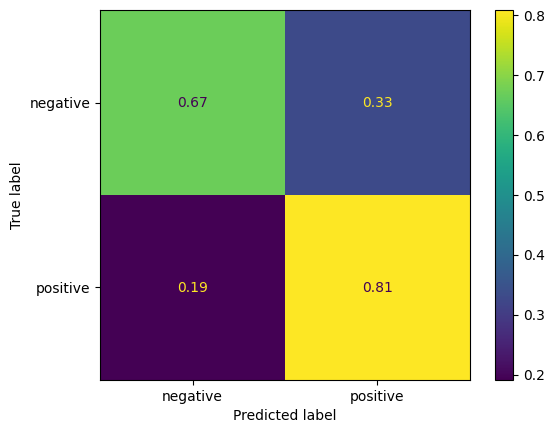

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

pred_y = [pred >= 0 for pred in model.predict(tf.convert_to_tensor(valid_x))]
print('accuracy: '+ str(accuracy_score(pred_y, valid_y)))

cmd = ConfusionMatrixDisplay(confusion_matrix(valid_y, pred_y,normalize='true'), display_labels=['negative', 'positive'])
cmd.plot()

Finally, let's print out the model summary to get an understanding of the number of parameters in the model:

### Encoder-Decoder models

The next step after using sequential models for labelling and classification is to move to encoder-decoder models.
Even better, encoder-decoder models with attention, to align the sequence processed by the encoder and the sequence processed by the decoder.

We warmly recommend to take a look at this tutorial: https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html (you can tun it in Google Colab).
The tutorial shows how to build a translation model using recurrent neural networks and the attention mechanism.
This was the last step before moving to the Transformer architectures (the current state-of-the-art).
The tutorial is useful to get a better understanding of the attention mechanism and how it is used to learn the alignment between two sequences.

## Sequence labelling with Recurrent Neural Network (using PyTorch)

In this section of the notebook I will run through an example of using LSTM (Long Short-term Memory) network for text sequence labelling.
We can train our own model for POS-tagging or NER.
Moreover, we can use pre-trained embedding models to encode the input text.

- We are going to use PyTorch (https://pytorch.org) to build and train our model. Pytorch is a state-of-the-art framework for deep leaning.

### Data preparation

As usual we start from data preparation.
We can use the [CoNLL 2003](https://www.clips.uantwerpen.be/conll2003/ner/) corpus, which provides corpora for POS-tagging, Chunking and NER in English and German.
Today we are going to focus on NER in English.

You can find a copy the English split in the `docs/` directory.
Usually the corpus should require preprocessing the data, here I am providing you with a version from Kaggle where documents have already been tagged (source: https://www.kaggle.com/datasets/alaakhaled/conll003-englishversion?resource=download)

Let's start by loading the three files (train/validation/test) in memory and reading all of them.

In [52]:
raw_data = dict()

for split in ['train', 'valid', 'test']:
    with open(f'docs/CoNLL - 2003/{split}.txt') as f:
        raw_data[split] = f.read().strip()

print(raw_data['train'][:500])

-DOCSTART- -X- -X- O

EU NNP B-NP B-ORG
rejects VBZ B-VP O
German JJ B-NP B-MISC
call NN I-NP O
to TO B-VP O
boycott VB I-VP O
British JJ B-NP B-MISC
lamb NN I-NP O
. . O O

Peter NNP B-NP B-PER
Blackburn NNP I-NP I-PER

BRUSSELS NNP B-NP B-LOC
1996-08-22 CD I-NP O

The DT B-NP O
European NNP I-NP B-ORG
Commission NNP I-NP I-ORG
said VBD B-VP O
on IN B-PP O
Thursday NNP B-NP O
it PRP B-NP O
disagreed VBD B-VP O
with IN B-PP O
German JJ B-NP B-MISC
advice NN I-NP O
to TO B-PP O
consumers NNS B-NP


Now we can parse the data.
Documents inside each split are separated by the sequence `-DOCSTART- -X- -X- O`.
Sentences inside each document are separated by the sequence`\n\n` (two new-line characters).
Each line inside a sentence represnets a token followed by the POS tag, the CHUNK tag and the NER tag, all separated by spaces.

Here NER tags are written using a system called BIO-tagging.
The 'B' stands for "begin" and introduces (starts) a new named entity, the tags are written as "B-PER" to indicate a person or "B-LOC" to indicate a location and so on.
The 'I' stands for "inside" and continues a started named entity, the tags are written as "I-PER" to indicate a person or "I-LOC" to indicate a location and so on.
The 'O' stands for outside, it means that the token is outside any named entity.
There are other tagging systems.  

In [53]:
keys = ['text', 'pos_tag', 'chunk_tag', 'ner_tag']

data = dict()

for split in raw_data:
    data[split] = list()
    for doc in raw_data[split].split('-DOCSTART- -X- -X- O')[1:]:
        for sentence in doc.strip().split('\n\n'):
            data[split].append(list())
            for elem in sentence.split('\n'):
                data[split][-1].append(dict(zip(keys, elem.split())))

In [54]:
data['train'][0]

[{'text': 'EU', 'pos_tag': 'NNP', 'chunk_tag': 'B-NP', 'ner_tag': 'B-ORG'},
 {'text': 'rejects', 'pos_tag': 'VBZ', 'chunk_tag': 'B-VP', 'ner_tag': 'O'},
 {'text': 'German', 'pos_tag': 'JJ', 'chunk_tag': 'B-NP', 'ner_tag': 'B-MISC'},
 {'text': 'call', 'pos_tag': 'NN', 'chunk_tag': 'I-NP', 'ner_tag': 'O'},
 {'text': 'to', 'pos_tag': 'TO', 'chunk_tag': 'B-VP', 'ner_tag': 'O'},
 {'text': 'boycott', 'pos_tag': 'VB', 'chunk_tag': 'I-VP', 'ner_tag': 'O'},
 {'text': 'British',
  'pos_tag': 'JJ',
  'chunk_tag': 'B-NP',
  'ner_tag': 'B-MISC'},
 {'text': 'lamb', 'pos_tag': 'NN', 'chunk_tag': 'I-NP', 'ner_tag': 'O'},
 {'text': '.', 'pos_tag': '.', 'chunk_tag': 'O', 'ner_tag': 'O'}]

Now all the labels are properly organised

At this point we need a system to encode and decode the labels into categorical entities.
We can use the label encoder from Scikit-Learn for that (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [55]:
from sklearn.preprocessing import LabelEncoder

pos_le = LabelEncoder().fit([token['pos_tag'] for split in data.values() for sentence in split for token in sentence])
chunk_le = LabelEncoder().fit([token['pos_tag'] for split in data.values() for sentence in split for token in sentence])
ner_le = LabelEncoder().fit([token['ner_tag'] for split in data.values() for sentence in split for token in sentence])

Now we have a module mapping from tags to IDs and vice-versa

In [56]:
ner_tag = ['I-PER']
ner_tag = ['I-LOC']
ner_tag = ['B-PER']
# ner_tag = ['O']

ner_le.transform(ner_tag)

array([3])

In [57]:
ner_tag_id = [0]

ner_le.inverse_transform(ner_tag_id)

array(['B-LOC'], dtype='<U6')

How many NER tags do we have?

In [58]:
len(ner_le.classes_)

9

Which are those tags?

In [59]:
ner_le.classes_

array(['B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG',
       'I-PER', 'O'], dtype='<U6')

Collect the same info for POS tags

In [60]:
# TODO

Finally we separate our train-validation-test splits

In [61]:
train_data, valid_data, test_data = data.values()

In [62]:
train_data[0]

[{'text': 'EU', 'pos_tag': 'NNP', 'chunk_tag': 'B-NP', 'ner_tag': 'B-ORG'},
 {'text': 'rejects', 'pos_tag': 'VBZ', 'chunk_tag': 'B-VP', 'ner_tag': 'O'},
 {'text': 'German', 'pos_tag': 'JJ', 'chunk_tag': 'B-NP', 'ner_tag': 'B-MISC'},
 {'text': 'call', 'pos_tag': 'NN', 'chunk_tag': 'I-NP', 'ner_tag': 'O'},
 {'text': 'to', 'pos_tag': 'TO', 'chunk_tag': 'B-VP', 'ner_tag': 'O'},
 {'text': 'boycott', 'pos_tag': 'VB', 'chunk_tag': 'I-VP', 'ner_tag': 'O'},
 {'text': 'British',
  'pos_tag': 'JJ',
  'chunk_tag': 'B-NP',
  'ner_tag': 'B-MISC'},
 {'text': 'lamb', 'pos_tag': 'NN', 'chunk_tag': 'I-NP', 'ner_tag': 'O'},
 {'text': '.', 'pos_tag': '.', 'chunk_tag': 'O', 'ner_tag': 'O'}]

Now let's build our simple vocabulary made up of all the words in our training set. We need a mapping of word->token to use to feed our network.

In [63]:
def build_vocab_and_tags(data):
    word2idx = {"<PAD>": 0, "<UNK>": 1}  # Il token di padding e il token delle parole out-of-vocabulary hanno indici riservati
    tag2idx = {"<PAD>": 0}  # Deve essere lo stesso indice di padding degll'input!
    for sent in data:
        for token in sent:
            word = token["text"]
            tag = token["ner_tag"]
            if word not in word2idx:
                word2idx[word] = len(word2idx)
            if tag not in tag2idx:
                tag2idx[tag] = len(tag2idx)
    return word2idx, tag2idx

word2idx, tag2idx = build_vocab_and_tags(train_data)
vocab_size = len(word2idx)
num_tags = len(tag2idx)
print(f"Vocabulary size: {vocab_size}")
print(f"Number of NER tags: {num_tags}")

Vocabulary size: 23625
Number of NER tags: 10


We can inspect our mapping:

In [64]:
word2idx

{'<PAD>': 0,
 '<UNK>': 1,
 'EU': 2,
 'rejects': 3,
 'German': 4,
 'call': 5,
 'to': 6,
 'boycott': 7,
 'British': 8,
 'lamb': 9,
 '.': 10,
 'Peter': 11,
 'Blackburn': 12,
 'BRUSSELS': 13,
 '1996-08-22': 14,
 'The': 15,
 'European': 16,
 'Commission': 17,
 'said': 18,
 'on': 19,
 'Thursday': 20,
 'it': 21,
 'disagreed': 22,
 'with': 23,
 'advice': 24,
 'consumers': 25,
 'shun': 26,
 'until': 27,
 'scientists': 28,
 'determine': 29,
 'whether': 30,
 'mad': 31,
 'cow': 32,
 'disease': 33,
 'can': 34,
 'be': 35,
 'transmitted': 36,
 'sheep': 37,
 'Germany': 38,
 "'s": 39,
 'representative': 40,
 'the': 41,
 'Union': 42,
 'veterinary': 43,
 'committee': 44,
 'Werner': 45,
 'Zwingmann': 46,
 'Wednesday': 47,
 'should': 48,
 'buy': 49,
 'sheepmeat': 50,
 'from': 51,
 'countries': 52,
 'other': 53,
 'than': 54,
 'Britain': 55,
 'scientific': 56,
 'was': 57,
 'clearer': 58,
 '"': 59,
 'We': 60,
 'do': 61,
 "n't": 62,
 'support': 63,
 'any': 64,
 'such': 65,
 'recommendation': 66,
 'because': 67

Now let's define the PyTorch Dataset:
- It is common while building applications with PyTorch to use [Datasets and DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

We first define a Dataset by defining a custom class class (with Dataset as superclass). This class will reimplement at least three core methods:
- `__init__` to initialize the variables used to store the actual data and labels
-` __len__` methods to determine the length of the dataset (based on the variabels declared in the __init__ method)
- `__getitem__` methods that will be called by the DataLoader object automatically, it must return a single sample of the dataset along with its label

Subsequently, we will define our DataLoader, which in turn needs to arrange batches of data.


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class NERDataset(Dataset):
    def __init__(self, data, word2idx, tag2idx):
        self.data = data
        self.word2idx = word2idx
        self.tag2idx = tag2idx

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sent = self.data[idx]
        words = [token["text"] for token in sent]
        tags = [token["ner_tag"] for token in sent]
        # Mapping words to indices, using <UNK> if the word is not present in the vocabulary
        word_indices = [self.word2idx.get(word, self.word2idx["<UNK>"]) for word in words]
        tag_indices = [self.tag2idx[tag] for tag in tags]
        return torch.tensor(word_indices, dtype=torch.long), torch.tensor(tag_indices, dtype=torch.long)

# Creazione dei dataset
train_dataset = NERDataset(train_data, word2idx, tag2idx)
valid_dataset = NERDataset(valid_data, word2idx, tag2idx)
test_dataset  = NERDataset(test_data, word2idx, tag2idx)

To define a DataLoader, having already define the DatasetObject, we need to define our custom collate function:
- `collate_fn` is a function that the DataLoader is calling everytime it needs to build a new batch of data. This is done because we need a custom function which pads sequences.


In [66]:
def collate_fn(batch):
    # batch: list of tuples (word_tensor, tag_tensor)
    # Get input sentences
    sentences = [item[0] for item in batch]
    # Get labels
    tags = [item[1] for item in batch]
    # Get maximum length in the batch
    lengths = [len(s) for s in sentences]
    max_len = max(lengths)

    # Pad shorter sentences to let the input tensors all have the same size
    padded_sentences = []
    padded_tags = []
    for s, t in zip(sentences, tags):
        pad_len = max_len - len(s)
        # Padding uses index 0 both for words and labels
        padded_sentences.append(torch.cat([s, torch.zeros(pad_len, dtype=torch.long)]))
        padded_tags.append(torch.cat([t, torch.zeros(pad_len, dtype=torch.long)]))

    #
    return torch.stack(padded_sentences), torch.stack(padded_tags), lengths

BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

### Defining and training the RNN model for NER

We start by importing the required modules

In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [68]:
class BiLSTM_NER(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_tags):
        super(BiLSTM_NER, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # Bidirectional LSTM; we set batch_first=True to have input like [batch, seq_len, embedding_dim]
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        # Fully connected layer to map hidden state coming from LSTM to output labels
        # (the hidden state is a concatenation of two LSTM outputs since it is bidirectional)
        self.fc = nn.Linear(hidden_dim * 2, num_tags)

    def forward(self, x):
        # x: [batch_size, seq_len]
        embeds = self.embedding(x)        # embeds: [batch_size, seq_len, embedding_dim]
        lstm_out, _ = self.lstm(embeds)   # lstm_out: [batch_size, seq_len, hidden_dim*2]
        logits = self.fc(lstm_out)        # logits: [batch_size, seq_len, num_tags]
        return logits

In [69]:
# Parametri del modello
EMBEDDING_DIM = 64
HIDDEN_DIM = 128
EPOCHS = 10

Initialize the model

In [70]:
model = BiLSTM_NER(vocab_size, EMBEDDING_DIM, HIDDEN_DIM, num_tags)

Define loss and optimizer:
- Note that we need to pay attention not computing the loss for padding tokens!

In [71]:
# We ignore padding token to calculate the loss
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(model.parameters(), lr=0.001)

Let's identify the device we are using

In [72]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


Move to model to the available device

In [73]:
model = model.to(device)

Training loop

In [74]:
from tqdm import tqdm

history = []

for epoch in range(EPOCHS):
    # Set the model in training mode
    model.train()
    epoch_loss = 0
    for inputs, targets, lengths in tqdm(train_loader):
        # Zero your gradients for every batch!
        optimizer.zero_grad()
        # Move input and output to target device
        inputs = inputs.to(device)
        targets = targets.to(device)
        # Run input though the model
        outputs = model(inputs)  # outputs: [batch, seq_len, num_tags]
        # Flat batch and seq_len dimensions to compute the loss
        outputs = outputs.view(-1, num_tags)
        targets = targets.view(-1)
        loss = criterion(outputs, targets)
        # Call the backward pass
        loss.backward()
        # Tell the optimizer to do a step forward in the training
        optimizer.step()
        # Record loss logs
        epoch_loss += loss.item()
        history.append(loss.item())
    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {epoch_loss / len(train_loader):.4f}")

100%|██████████| 439/439 [00:08<00:00, 53.75it/s]


Epoch 1/10 - Loss: 0.6261


100%|██████████| 439/439 [00:07<00:00, 61.20it/s]


Epoch 2/10 - Loss: 0.3225


100%|██████████| 439/439 [00:07<00:00, 60.22it/s]


Epoch 3/10 - Loss: 0.2067


100%|██████████| 439/439 [00:07<00:00, 57.86it/s]


Epoch 4/10 - Loss: 0.1390


100%|██████████| 439/439 [00:07<00:00, 56.81it/s]


Epoch 5/10 - Loss: 0.0930


100%|██████████| 439/439 [00:07<00:00, 58.06it/s]


Epoch 6/10 - Loss: 0.0612


100%|██████████| 439/439 [00:07<00:00, 55.42it/s]


Epoch 7/10 - Loss: 0.0374


100%|██████████| 439/439 [00:07<00:00, 57.53it/s]


Epoch 8/10 - Loss: 0.0219


100%|██████████| 439/439 [00:07<00:00, 55.85it/s]


Epoch 9/10 - Loss: 0.0126


100%|██████████| 439/439 [00:08<00:00, 51.02it/s]

Epoch 10/10 - Loss: 0.0070


Text(0, 0.5, 'Loss')

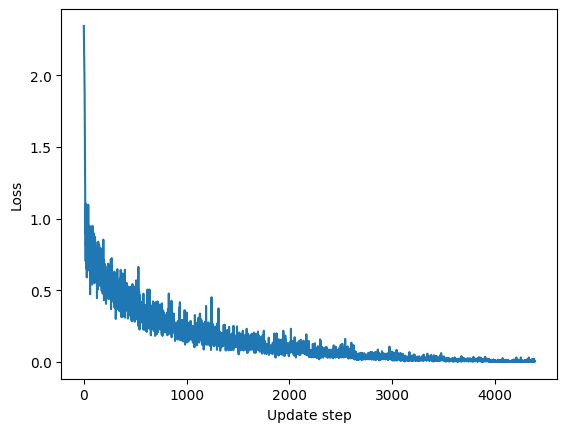

In [75]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(len(history)), history)
plt.xlabel('Update step')
plt.ylabel('Loss')

Validation

In [76]:
model.eval()
with torch.no_grad():
    total_loss = 0
    for inputs, targets, lengths in valid_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        outputs = outputs.view(-1, num_tags)
        targets = targets.view(-1)
        loss = criterion(outputs, targets)
        total_loss += loss.item()
    print("Validation Loss:", total_loss / len(valid_loader))

Validation Loss: 0.3038798440093695


Test inference

In [77]:
# Define an inverse dictionary to decode labels (idx -> tag)
idx2tag = {idx: tag for tag, idx in tag2idx.items()}
# If we also want to decode words, we need to build an inverse dictionary also for words
idx2word = {idx: word for word, idx in word2idx.items()}

In [78]:
# Esempio di inference e decodifica per il Test Set
model.eval()
with torch.no_grad():
    for inputs, targets, lengths in test_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        # Run the model with the current input
        outputs = model(inputs)
        # Get the tag with the highest probability for each token
        predicted_tags = torch.argmax(outputs, dim=-1)

        # Decoding and printing predicted ner tags for every sample in the batch
        for i in range(len(inputs)):
          seq_len = lengths[i]

          # Extract original indices (not considering padding)
          sentence_indices = inputs[i][:seq_len].tolist()
          true_tag_indices = targets[i][:seq_len].tolist()
          pred_tag_indices = predicted_tags[i][:seq_len].tolist()

          # Deconde indices in words and tags
          sentence_tokens = [idx2word.get(idx, "<UNK>") for idx in sentence_indices]
          true_tags = [idx2tag[idx] for idx in true_tag_indices]
          pred_tags = [idx2tag[idx] for idx in pred_tag_indices]

          print("Original Sentence: ", sentence_tokens)
          print("Ground Truth NER Tags:", true_tags)
          print("Predicted NER Tags:  ", pred_tags)
          print("-" * 50)
        break  # Run only the first batch

Original Sentence:  ['SOCCER', '-', '<UNK>', '<UNK>', '<UNK>', 'WIN', ',', 'CHINA', 'IN', '<UNK>', 'DEFEAT', '.']
Ground Truth NER Tags: ['O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'O']
Predicted NER Tags:   ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
--------------------------------------------------
Original Sentence:  ['<UNK>', '<UNK>']
Ground Truth NER Tags: ['B-PER', 'I-PER']
Predicted NER Tags:   ['O', 'O']
--------------------------------------------------
Original Sentence:  ['<UNK>', ',', 'United', 'Arab', 'Emirates', '<UNK>']
Ground Truth NER Tags: ['B-LOC', 'O', 'B-LOC', 'I-LOC', 'I-LOC', 'O']
Predicted NER Tags:   ['O', 'O', 'B-LOC', 'I-LOC', 'O', 'O']
--------------------------------------------------
Original Sentence:  ['Japan', 'began', 'the', 'defence', 'of', 'their', 'Asian', 'Cup', 'title', 'with', 'a', 'lucky', '2-1', 'win', 'against', 'Syria', 'in', 'a', 'Group', 'C', 'championship', 'match', 'on', 'Friday', '.']
Ground Truth NE

In [79]:
from sklearn.metrics import classification_report

all_true = []
all_pred = []

model.eval()
with torch.no_grad():
    for inputs, targets, lengths in test_loader:
      inputs = inputs.to(device)
      targets = targets.to(device)
      outputs = model(inputs)
      predicted_tags = torch.argmax(outputs, dim=-1)
      # For each sequence in the batch, collect true and predicted labels (excluding padding)
      for i in range(len(inputs)):
          seq_len = lengths[i]
          true_tag_indices = targets[i][:seq_len].tolist()
          pred_tag_indices = predicted_tags[i][:seq_len].tolist()
          all_true.extend(true_tag_indices)
          all_pred.extend(pred_tag_indices)

# Optionally, filter out the padding index (0) if it might be present in the evaluation,
# but since we use the actual sequence lengths, padding should not be included.
# Create a list of target names sorted by tag index, excluding the PAD tag
target_names = [idx2tag[idx] for idx in sorted(idx2tag.keys()) if idx != 0]

# Print the classification report
print(classification_report(all_true, all_pred, target_names=target_names))

              precision    recall  f1-score   support

       B-ORG       0.80      0.58      0.67      1661
           O       0.94      0.99      0.96     38323
      B-MISC       0.66      0.65      0.65       702
       B-PER       0.84      0.49      0.62      1617
       I-PER       0.90      0.45      0.60      1156
       B-LOC       0.88      0.71      0.79      1668
       I-ORG       0.78      0.62      0.69       835
      I-MISC       0.55      0.61      0.58       216
       I-LOC       0.85      0.54      0.66       257

    accuracy                           0.92     46435
   macro avg       0.80      0.63      0.69     46435
weighted avg       0.92      0.92      0.91     46435



What do we see from these results?